<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/Plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.models import load_model
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [3]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0,rotation_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   zoom_range = 0.2)
test = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
train_data = train.flow_from_directory('/content/drive/MyDrive/data', target_size=(128,128),batch_size = 10, class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/data_test', target_size=(128,128), class_mode='categorical')

Found 1190 images belonging to 6 classes.
Found 219 images belonging to 6 classes.


In [18]:
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

train_index : {'Corn_Common_Rust': 0, 'Corn_Gray_Leaf_Spot': 1, 'Corn_Healthy': 2, 'bean_healthy': 3, 'bean_leaf_spot': 4, 'bean_rust': 5}
test_index: {'Corn_Common_Rust': 0, 'Corn_Gray_leaf_spot': 1, 'Corn_Heathy': 2, 'bean_healthy': 3, 'bean_leaf_spot': 4, 'bean_rust': 5}


In [19]:
model= Sequential()
## lop CNN1
model.add(Conv2D(128, kernel_size=(3,3), activation='relu',input_shape=(128,128,3), padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(32,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN4
model.add(Conv2D(16,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN5
model.add(Conv2D(8,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

classes = 6

In [20]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.4))
# lop outpu
model.add(Dense(classes, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)      

In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 10,restore_best_weights=True)

In [23]:
history=model.fit(train_data,epochs=85,batch_size=64,verbose=1, 
                  validation_data=test_data,callbacks=[callback])

Epoch 1/85
119/119 [==============================] - 148s 1s/step - loss: 1.5855 - accuracy: 0.2899 - val_loss: 1.7713 - val_accuracy: 0.2648
Epoch 2/85
119/119 [==============================] - 145s 1s/step - loss: 1.4692 - accuracy: 0.3378 - val_loss: 1.7305 - val_accuracy: 0.1872
Epoch 3/85
119/119 [==============================] - 145s 1s/step - loss: 1.3724 - accuracy: 0.4176 - val_loss: 1.5297 - val_accuracy: 0.3973
Epoch 4/85
119/119 [==============================] - 139s 1s/step - loss: 1.0145 - accuracy: 0.5891 - val_loss: 1.1377 - val_accuracy: 0.5845
Epoch 5/85
119/119 [==============================] - 144s 1s/step - loss: 0.9436 - accuracy: 0.6353 - val_loss: 0.9819 - val_accuracy: 0.6393
Epoch 6/85
119/119 [==============================] - 143s 1s/step - loss: 0.8098 - accuracy: 0.6924 - val_loss: 0.9155 - val_accuracy: 0.6347
Epoch 7/85
119/119 [==============================] - 142s 1s/step - loss: 0.7578 - accuracy: 0.7109 - val_loss: 0.7874 - val_accuracy: 0.6804

In [24]:
value=model.evaluate(test_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 0.6367491483688354
accuracy 0.7716894745826721


In [25]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelfinal5.h5')

<ipython-input-26-cabcf3b085bf>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


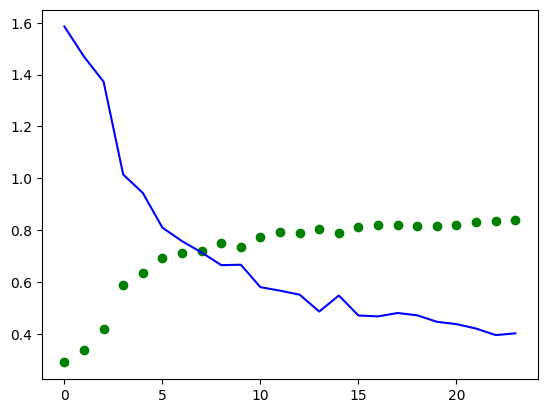

In [26]:

accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

In [8]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/modelfinal5.h5')
history=model.fit(train_data,epochs=85,batch_size=64,verbose=1, 
                  validation_data=test_data,callbacks=[callback])
value=model.evaluate(test_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

Epoch 1/85
119/119 [==============================] - 366s 3s/step - loss: 0.3531 - accuracy: 0.8462 - val_loss: 0.6825 - val_accuracy: 0.7900
Epoch 2/85
119/119 [==============================] - 139s 1s/step - loss: 0.3828 - accuracy: 0.8429 - val_loss: 0.6716 - val_accuracy: 0.7626
Epoch 3/85
119/119 [==============================] - 143s 1s/step - loss: 0.3481 - accuracy: 0.8622 - val_loss: 0.6757 - val_accuracy: 0.7489
Epoch 4/85
119/119 [==============================] - 147s 1s/step - loss: 0.3152 - accuracy: 0.8765 - val_loss: 0.8049 - val_accuracy: 0.7352
Epoch 5/85
119/119 [==============================] - 141s 1s/step - loss: 0.3459 - accuracy: 0.8546 - val_loss: 0.6078 - val_accuracy: 0.7671
Epoch 6/85
119/119 [==============================] - 139s 1s/step - loss: 0.3028 - accuracy: 0.8756 - val_loss: 0.6476 - val_accuracy: 0.7991
Epoch 7/85
119/119 [==============================] - 141s 1s/step - loss: 0.3393 - accuracy: 0.8655 - val_loss: 0.7515 - val_accuracy: 0.7534

<ipython-input-9-fffe2deaf1a5>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


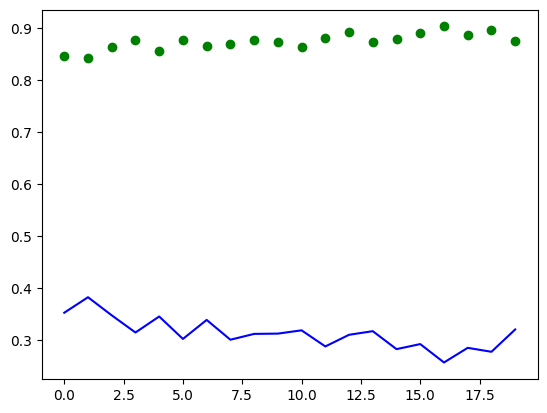

In [9]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelfinal5.h5')

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

Epoch 1/85
119/119 [==============================] - 144s 1s/step - loss: 0.2904 - accuracy: 0.8874 - val_loss: 0.7091 - val_accuracy: 0.7534
Epoch 2/85
119/119 [==============================] - 144s 1s/step - loss: 0.2778 - accuracy: 0.8874 - val_loss: 0.6120 - val_accuracy: 0.8265
Epoch 3/85
119/119 [==============================] - 141s 1s/step - loss: 0.2906 - accuracy: 0.8924 - val_loss: 0.6788 - val_accuracy: 0.7580
Epoch 4/85
119/119 [==============================] - 142s 1s/step - loss: 0.2932 - accuracy: 0.8891 - val_loss: 0.8550 - val_accuracy: 0.7352
Epoch 5/85
119/119 [==============================] - 140s 1s/step - loss: 0.3204 - accuracy: 0.8748 - val_loss: 0.7185 - val_accuracy: 0.7671
Epoch 6/85
119/119 [==============================] - 143s 1s/step - loss: 0.2733 - accuracy: 0.8916 - val_loss: 0.6161 - val_accuracy: 0.7763
Epoch 7/85
119/119 [==============================] - 142s 1s/step - loss: 0.2719 - accuracy: 0.8832 - val_loss: 0.5367 - val_accuracy: 0.8584

<ipython-input-11-1274a0cc64d2>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


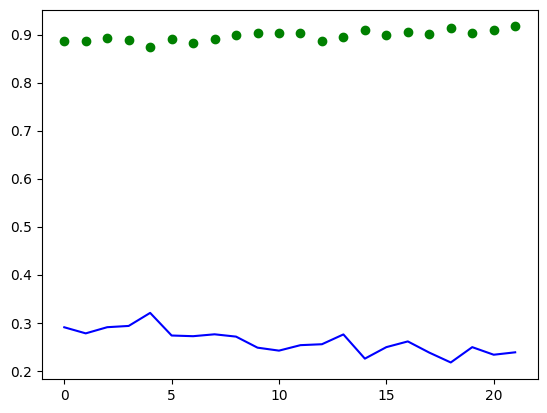

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 15,restore_best_weights=True)
model = load_model('/content/drive/MyDrive/Colab Notebooks/modelfinal5.h5')
history=model.fit(train_data,epochs=85,batch_size=64,verbose=1, 
                  validation_data=test_data,callbacks=[callback])
value=model.evaluate(test_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])
model.save('/content/drive/MyDrive/Colab Notebooks/modelfinal5i.h5')
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 151ms/step
Predicted:  Corn_Gray_Leaf_Spot


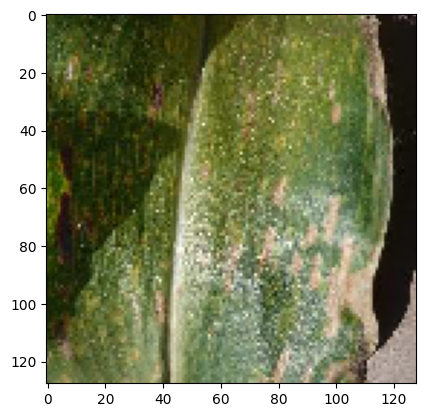

In [16]:
## lay model tu google drive va tien hanh nhan dien
model = load_model('/content/drive/MyDrive/Colab Notebooks/modelfinal5i.h5')
name_foods=['Corn_Common_Rust', 'Corn_Gray_Leaf_Spot', 'Corn_Healthy', 'bean_healthy', 'bean_leaf_spot', 'bean_rust']
filePath = '/content/drive/MyDrive/data_test/Corn_Gray_leaf_spot/Corn_Gray_Spot (512).JPG'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)